In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# **Importovanje biblioteka**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras import models
from keras import layers

# Pretprocesiranje podataka

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Thyroid Cancer Recurrence/Dataset/filtered_thyroid_data.csv')

In [ ]:
data.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
for col in data.columns:
    print(data[col].value_counts())
    print("-" * 40)

Age
31    22
27    13
30    12
33    12
40    12
      ..
79     1
15     1
82     1
64     1
78     1
Name: count, Length: 65, dtype: int64
----------------------------------------
Gender
F    312
M     71
Name: count, dtype: int64
----------------------------------------
Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64
----------------------------------------
Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64
----------------------------------------
Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64
----------------------------------------
Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: int64
----------------------------------------
Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64
----------------------------------------
T
T2     151
T3a     96
T1a   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


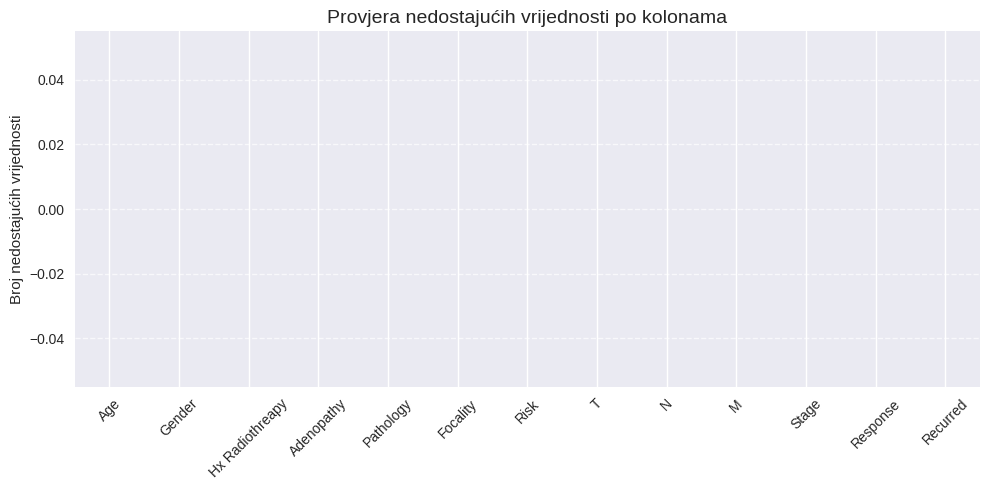

In [ ]:
missing_values = data.isnull().sum()

plt.figure(figsize=(10,5))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Provjera nedostajućih vrijednosti po kolonama', fontsize=14)
plt.ylabel('Broj nedostajućih vrijednosti')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Nemamo null vrijednosti u datasetu.

In [ ]:
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


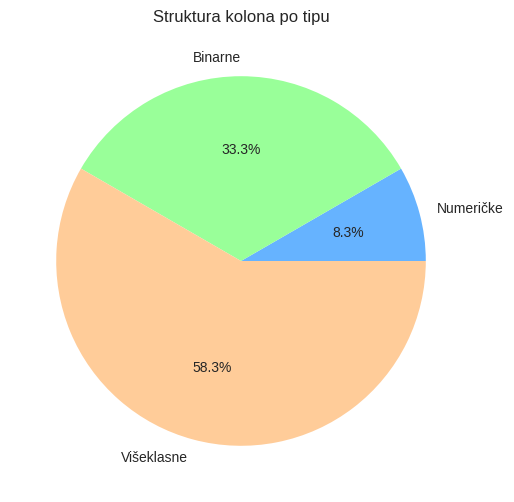

In [ ]:
col_types = {'Numeričke': 1, 'Binarne': 4, 'Višeklasne': 7}

plt.figure(figsize=(6,6))
plt.pie(col_types.values(), labels=col_types.keys(), autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Struktura kolona po tipu')
plt.show()


Sve kolone osim Age su kategorijske tako da ih treba pretvoriti u numeričke vrijednosti.

In [4]:
le = LabelEncoder()

data['Recurred'] = le.fit_transform(data['Recurred']) # pretvaranje labels kolone u brojeve
print(data['Recurred'])
y = data['Recurred']

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64


In [5]:
binary_cols = ['Gender', 'Hx Radiothreapy', 'Focality', 'M'] # binarne kolone također pretvaramo pomoću LabelEncoder


for col in binary_cols:
    data[col] = le.fit_transform(data[col])
    print(data[col])

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Gender, Length: 383, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    0
381    1
382    0
Name: Hx Radiothreapy, Length: 383, dtype: int64
0      1
1      1
2      1
3      1
4      0
      ..
378    1
379    0
380    0
381    0
382    0
Name: Focality, Length: 383, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    0
382    0
Name: M, Length: 383, dtype: int64


In [6]:
multiclass_cols = ['Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response'] # one hot kodiranje viseklasnih kategorijskih kolona

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(data[multiclass_cols])
encoded_data = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(multiclass_cols))

data = data.drop(columns=multiclass_cols)
data = pd.concat([data, encoded_data], axis=1)

print(data.head())

   Age  Gender  Hx Radiothreapy  Focality  M  Recurred  Adenopathy_Bilateral  \
0   27       0                0         1  0         0                   0.0   
1   34       0                0         1  0         0                   0.0   
2   30       0                0         1  0         0                   0.0   
3   62       0                0         1  0         0                   0.0   
4   62       0                0         0  0         0                   0.0   

   Adenopathy_Extensive  Adenopathy_Left  Adenopathy_No  ...  N_N1b  Stage_I  \
0                   0.0              0.0            1.0  ...    0.0      1.0   
1                   0.0              0.0            1.0  ...    0.0      1.0   
2                   0.0              0.0            1.0  ...    0.0      1.0   
3                   0.0              0.0            1.0  ...    0.0      1.0   
4                   0.0              0.0            1.0  ...    0.0      1.0   

   Stage_II  Stage_III  Stage_IVA  Sta

In [7]:
data['Age'] = MinMaxScaler().fit_transform(data[['Age']]) # normalizacija Age kolone

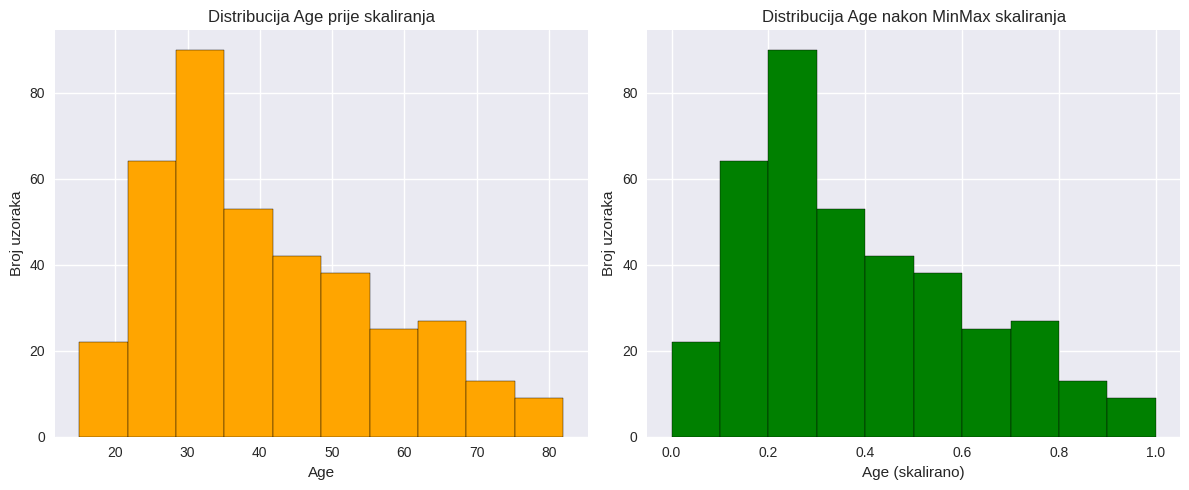

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(data['Age'], bins=10, color='orange', edgecolor='black')
plt.title('Distribucija Age prije skaliranja')
plt.xlabel('Age')
plt.ylabel('Broj uzoraka')


scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(data[['Age']])

plt.subplot(1,2,2)
plt.hist(age_scaled, bins=10, color='green', edgecolor='black')
plt.title('Distribucija Age nakon MinMax skaliranja')
plt.xlabel('Age (skalirano)')
plt.ylabel('Broj uzoraka')

plt.tight_layout()
plt.show()


In [9]:
data = data.drop('Recurred', axis=1)
X = data
print(X ,'\n')
print (y)

          Age  Gender  Hx Radiothreapy  Focality  M  Adenopathy_Bilateral  \
0    0.179104       0                0         1  0                   0.0   
1    0.283582       0                0         1  0                   0.0   
2    0.223881       0                0         1  0                   0.0   
3    0.701493       0                0         1  0                   0.0   
4    0.701493       0                0         0  0                   0.0   
..        ...     ...              ...       ... ..                   ...   
378  0.850746       1                1         1  1                   0.0   
379  0.985075       1                1         0  1                   0.0   
380  0.850746       1                0         0  1                   1.0   
381  0.686567       1                1         0  0                   0.0   
382  0.776119       1                0         0  0                   1.0   

     Adenopathy_Extensive  Adenopathy_Left  Adenopathy_No  \
0             

In [ ]:
X.head()

,Age,Gender,Hx Radiothreapy,Focality,M,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,...,N_N1b,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.179104,0,0,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.283582,0,0,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.223881,0,0,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.701493,0,0,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.701493,0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model neuronske mreže

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,Gender,Hx Radiothreapy,Focality,M,Adenopathy_Bilateral,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,...,N_N1b,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
165,0.373134,0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
321,0.701493,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
220,0.208955,0,0,1,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
94,0.328358,0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
232,0.238806,0,0,1,0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7343 - loss: 0.6495 - val_accuracy: 0.7097 - val_loss: 0.5914
Epoch 2/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8076 - loss: 0.4861 - val_accuracy: 0.7581 - val_loss: 0.4602
Epoch 3/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8269 - loss: 0.3999 - val_accuracy: 0.8065 - val_loss: 0.3559
Epoch 4/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8859 - loss: 0.2965 - val_accuracy: 0.8548 - val_loss: 0.2847
Epoch 5/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9098 - loss: 0.2184 - val_accuracy: 0.8548 - val_loss: 0.2395
Epoch 6/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9503 - loss: 0.1465 - val_accuracy: 0.8710 - val_loss: 0.2210
Epoch 7/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.1370 - val_accuracy: 0.9032 - val_loss: 0.2057
Epoch 8/12
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9719 - loss: 0.1109 - val_accuracy: 0.9032 - val_loss

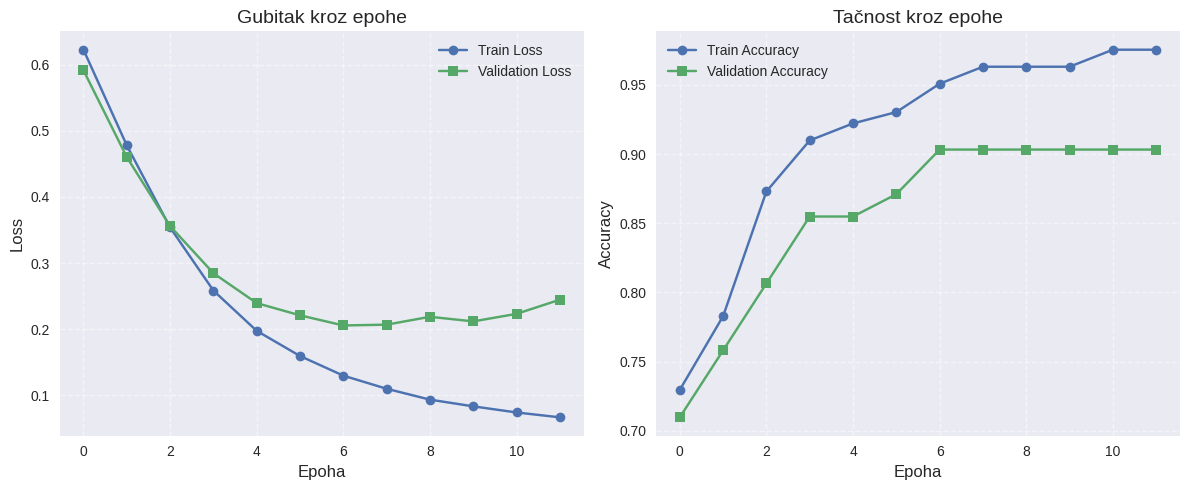

In [12]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=12,
    batch_size=8,
)

plt.figure(figsize=(12, 5))

# Loss graf
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], 's-', label='Validation Loss')
plt.title('Gubitak kroz epohe', fontsize=14)
plt.xlabel('Epoha', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Accuracy graf
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 's-', label='Validation Accuracy')
plt.title('Tačnost kroz epohe', fontsize=14)
plt.xlabel('Epoha', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('grafovi.png', dpi=300)
plt.show()


In [13]:
_, accuracy = model.evaluate(X_test, y_test)
print("Tacnost: {:.2f}%".format(accuracy * 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9831 - loss: 0.0593
Tacnost: 97.40%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77



In [16]:
import numpy as np
import pandas as pd

user_input = {
    'Age': float(input('Unesite godine: ')),
    'Gender': input('Spol (M/F): '),
    'Hx Radiothreapy': input('Imate li historiju radioterapije? (Yes/No): '),
    'Adenopathy': input('Imate li uvećane limfne čvorove (No/Right/Bilateral/Left/Extensive/Posterior): '),
    'Pathology': input('Tip karcinoma (Papillary/Micropapillary/Follicular/Hurthel cell): '),
    'Focality': input('Fokalnost (Uni-Focal/Multi-Focal): '),
    'Risk': input('Procijenjeni rizik bolesti (Low/Intermediate/High): '),
    'T': input('Tumorski stadij (T1a/T1b/T2/T3a/T3b/T4a/T4b): '),
    'N': input('Status limfnih čvorova (N0/N1a/N1b): '),
    'M': input('Metastaze (M0/M1): '),
    'Stage': input('Klinički stadij bolesti (I/II/III/IVA/IVB): '),
    'Response': input('Odgovor na terapiju (Excellent/Structural Incomplete/Indeterminate/Biochemical Incomplete): ')
}

user_df = pd.DataFrame([user_input])

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

binary_cols = ['Gender', 'Hx Radiothreapy', 'Focality', 'M']
le = LabelEncoder()

binary_mappings = {}
for col in binary_cols:
    le.fit(data[col])  # koristi trening podatke
    binary_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    user_df[col] = user_df[col].map(binary_mappings[col])

multiclass_cols = ['Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response']
user_encoded = encoder.transform(user_df[multiclass_cols])
user_encoded_df = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(multiclass_cols))


scaler = MinMaxScaler()
scaler.fit(data[['Age']])  # koristi trening podatke
user_df['Age'] = scaler.transform(user_df[['Age']])

user_df = user_df.drop(columns=multiclass_cols)
user_final = pd.concat([user_df, user_encoded_df], axis=1)

prediction = model.predict(user_final)

result = 'YES' if prediction[0][0] > 0.5 else 'NO'
print(f"\n Predikcija: Recurred = {result}")


Unesite godine: 25
Spol (M/F): F
Imate li historiju radioterapije? (Yes/No): Yes
Imate li uvećane limfne čvorove (No/Right/Bilateral/Left/Extensive/Posterior): No
Tip karcinoma (Papillary/Micropapillary/Follicular/Hurthel cell): Papillary
Fokalnost (Uni-Focal/Multi-Focal): Uni-Focal
Procijenjeni rizik bolesti (Low/Intermediate/High): Low
Tumorski stadij (T1a/T1b/T2/T3a/T3b/T4a/T4b): T1a
Status limfnih čvorova (N0/N1a/N1b): N0
Metastaze (M0/M1): M0
Klinički stadij bolesti (I/II/III/IVA/IVB): II
Odgovor na terapiju (Excellent/Structural Incomplete/Indeterminate/Biochemical Incomplete): Excellent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

 Predikcija: Recurred = NO
